In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#img=cv2.imread("car_trial.jpg")
img=cv2.imread("shapes.png")
img=cv2.resize(img,(400,300))
imageCounter=img.copy()

In [3]:
def getContours(img):
    image,contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area=cv2.contourArea(cnt)
        #print(area)
          
        if(area>500):
            cv2.drawContours(imageCounter,cnt,-1,(255,0,0),3) #thickness 3
            peri=cv2.arcLength(cnt,True) # shape is closed so written True
            approx=cv2.approxPolyDP(cnt,0.02*peri,True)
            #print(len(approx))
            objCorner=len(approx)
            x,y,w,h=cv2.boundingRect(approx)
            
            if objCorner==3: objectType="tri"
            elif objCorner==4:
                aspRatio=w/float(h)
                if aspRatio>0.95 and aspRatio<1.05:objectType="square"
                else:objectType="rectangle"
            elif objCorner>4: objectType="circle"
            else:objectType="None"
            cv2.rectangle(imageCounter,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(imageCounter,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)   
                

In [4]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur=cv2.GaussianBlur(imgGray,(7,7),1) # kernel=(7,7) sigma=1, higher the sigma higher the blur
imgCanny=cv2.Canny(imgBlur,50,50) # 50 is threshold
imgBlank=np.zeros_like(img)
getContours(imgCanny)

cv2.imshow("original",img)
cv2.imshow("gray",imgGray)
cv2.imshow("blur",imgBlur)
cv2.imshow("imageContour",imageCounter)
#hor=np.hstack((img,imgGray))
cv2.waitKey(0)
     
cv2.destroyAllWindows()


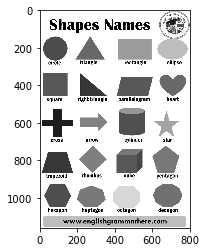

In [10]:
plt.imshow(imgGray,cmap="gray")


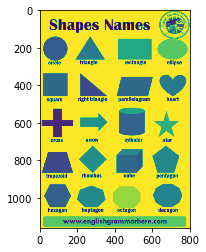

In [8]:
plt.imshow(imgBlur)